# Exploring Urban Concerns: A Comprehensive Analysis of NYC 311 Data
## Introduction
As a data analyst, I have embarked on an insightful journey through the heart of New York City's civic engagement, anchored by the 311 call service data. This service, a lifeline for New Yorkers, provides an essential channel for non-emergency inquiries and reports, reflecting the city's collective concerns, needs, and the responsiveness of its governance.

My analysis delves into a dataset that charts the vast landscape of these service requests, drawing from the comprehensive records available at the NYC Open Data portal at https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9.

While this repository is updated daily and includes a complete log of requests and their resolutions, I have focused on a snapshot of this data, capturing information up to August 4, 2023. To maintain relevance and manageability, several columns that do not serve the purpose of this project have been meticulously removed, ensuring a concentrated examination of the most pertinent data.

Working with the 'Project-3_NYC_311_Calls.pkl' file, my analysis is built on a foundation of 32 million calls, each a story of an individual's interaction with the city's services. This dataset is a reflection of the collective voice of the city, and in it, I seek patterns, anomalies, and insights that could not only narrate the story of a city's operational challenges but also highlight opportunities for policy-making and service improvement.

## Data Exploration and Preprocessing

### 1. Data Loading: The First Glimpse into NYC's 311 Requests
I began by loading the dataset into our analytical environment. Upon initial observation, the data unfolded in rows and columns, each row a unique story, each column a different aspect of that narrative. Here's a glimpse of the data structure we're working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_pickle('shared/Project-3_NYC_311_Calls.pkl')

### 2. Data Preparation: Setting the Stage for Analysis
Data, in its raw form, often comes with imperfections. I took the necessary steps to cleanse and preprocess our dataset. This included handling missing values and ensuring that our timestamps were in the correct format. These steps are not just about tidying up; they're about setting the stage for accurate and reliable analysis.

In [2]:
# Checking for missing values and data types
print(df.isnull().sum())
print(df.dtypes)

# Converting 'Created Date' to datetime and setting it as index
df = df.set_index(pd.DatetimeIndex(df['Created Date']))
del df['Created Date']

### 3. Unveiling Patterns: An EDA of NYC's Service Requests
In the exploratory phase, I dove into the dataset to unearth initial insights. Descriptive statistics offered us a high-level overview, while visualizations began to paint a picture of the five most prevalent complaints among New Yorkers. It’s through these visual explorations that we start to see the rhythm of city life emerge from the data.Showcasing the range of the data too.

         Unique Key
count  3.378098e+07
mean   3.802665e+07
std    1.209574e+07
min    1.056422e+07
25%    2.793121e+07
50%    3.798303e+07
75%    4.830951e+07
max    5.840682e+07


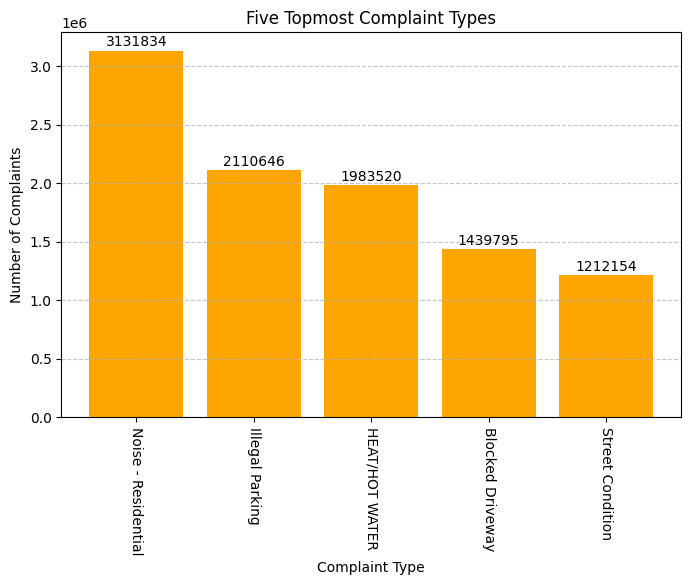

Earliest Date: 2010-01-01 00:00:00
Latest Date: 2023-08-04 12:00:00


In [3]:
# Descriptive statistics
print(df.describe())

# Count the number of each complaint type
complaint_counts = df['Complaint Type'].value_counts()

# Select the top 5 complaint types
top5_complaints = complaint_counts.head(5)

# Plot the top 5 complaint types
plt.figure(figsize=(8, 5))
#top5_complaints.plot(kind='bar')
bars = plt.bar(top5_complaints.index,top5_complaints.values, color="orange")
plt.title('Five Topmost Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(top5_complaints.index)
plt.xticks(rotation=270)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f"{int(height)}",  # Format the count as an integer
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset for better placement
        textcoords="offset points",
        ha="center",
    )

plt.show()

# The range of the data
print("Earliest Date:", df.index.min())
print("Latest Date:", df.index.max())

## Analyses of these data
From understanding the average number of daily complaints in 2022 to identifying peak days for service requests and the most common complaint types, these inquiries helped not just to quantify the data, but to qualify the experiences behind these numbers.

### 1. Understanding Daily Dynamics: Analyzing Complaints in 2022

In [4]:
# Filter data for the year 2022
data_2022 = df[df.index.year == 2022]

# Resample to get daily counts and calculate the average
average_daily_complaints_2022 = data_2022.resample('D')['Unique Key'].count().mean()
print("Average Number of Daily Complaints in 2022:", average_daily_complaints_2022)

Average Number of Daily Complaints in 2022: 8684.320547945206


### 2. Identifying Peak Moments: The Day of Maximum Calls

In [5]:
# Group by date and count the number of calls
calls_per_day = df.groupby(df.index.date).size()

# Find the date with the maximum number of calls
max_calls_date = calls_per_day.idxmax()
max_calls_count = calls_per_day.max()

print(f"Date with Maximum Number of Calls: {max_calls_date}, Number of Calls: {max_calls_count}")

Date with Maximum Number of Calls: 2020-08-04, Number of Calls: 24415


### 3. Delving into the Busiest Day: Top Complaints Uncovered

In [6]:
# Filter data for the date with maximum calls
data_max_calls = df[df.index.date == max_calls_date]

# Find the most common complaint type
most_common_complaint = data_max_calls['Complaint Type'].value_counts().idxmax()
print(f"Most Common Complaint on {max_calls_date}: {most_common_complaint}")


Most Common Complaint on 2020-08-04: Damaged Tree


### 4. Tracing Seasonal Quietness: Finding the Least Busy Month

In [7]:
# Group by year and month, then count the number of calls
calls_per_month = df.groupby([df.index.year, df.index.month]).size()

# Find the month with the fewest calls
quietest_month_info = calls_per_month.idxmin()
quietest_month_count = calls_per_month.min()

print(f"Quietest Month (Year, Month): {quietest_month_info}, Number of Calls: {quietest_month_count}")


Quietest Month (Year, Month): (2023, 8), Number of Calls: 28570


### 5. The Rhythm of the City: Seasonal Trends on Christmas Day

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Make sure the DataFrame is sorted by the DateTime index
df.sort_index(inplace=True)

# Resample data to daily frequency and fill missing values if there are any
daily_data = df['Unique Key'].resample('D').count()

# The index must have a frequency set (e.g., 'D' for daily frequency)
daily_data = daily_data.asfreq('D')

# Perform ETS decomposition
decomposition = seasonal_decompose(daily_data, model='additive')

# Extract and round the seasonal component for 2020-12-25
seasonal_component = round(decomposition.seasonal.loc['2020-12-25'])
print("Seasonal Component on 2020-12-25:", seasonal_component)


Seasonal Component on 2020-12-25: 183


### 6. Measuring Echoes of the Past: Autocorrelation in Daily Calls

In [9]:
# Calculate autocorrelation with lag of 1
from statsmodels.tsa.stattools import acf
print("Autocorrelation with Lag of 1:", acf(daily_data)[1])

Autocorrelation with Lag of 1: 0.7505142364756073


### 7. Predicting the Pulse of the City: Forecasting with Prophet

In [11]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Prepare the data for Prophet
prophet_data = daily_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Split the data into training and test sets
train = prophet_data[:-90]
test = prophet_data[-90:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train)

# Make predictions
predictions = model.predict(test[['ds']])

# Calculate RMSE
rmse = mean_squared_error(test['y'], predictions['yhat'], squared=False)
print("RMSE on Test Set:", rmse)

06:45:03 - cmdstanpy - INFO - Chain [1] start processing
06:45:04 - cmdstanpy - INFO - Chain [1] done processing


RMSE on Test Set: 1231.513760758433


## Conclusion
In conclusion, our journey through the NYC 311 service requests has been revealing. We've not only quantified the data but also connected with the voices behind these numbers. The insights we've gained provide a roadmap to better address the needs of NYC residents and improve city management.

As I present these findings, it is with the professional understanding that they are not merely retrospective observations but a forward-looking compass, guiding strategic decision-making to enhance the responsiveness and efficiency of city services.

**********************************************
## End of Document 
**********************************************